In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns

#Salary Train Dataset

In [2]:
SD=pd.read_csv('SalaryData_Train.csv')
SD

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
label_encoder = LabelEncoder()
sd = SD.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
sd = sd.drop('capitalgain', axis = 1)
sd=sd.drop('capitalloss',axis=1)
sd

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,40,37,0
1,50,4,9,13,2,3,0,4,1,13,37,0
2,38,2,11,9,0,5,1,4,1,40,37,0
3,53,2,1,7,2,5,0,2,1,40,37,0
4,28,2,9,13,2,9,5,2,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,40,37,1
30158,58,2,11,9,6,0,4,4,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,20,37,0


Text(0, 0.5, 'educationno ')

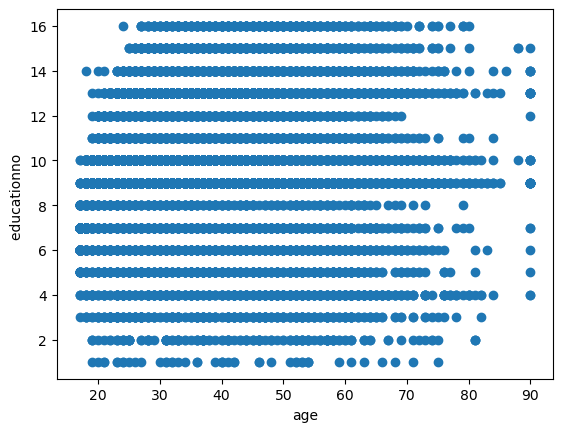

In [4]:
plt.scatter(sd["age"],sd["educationno"])

plt.xlabel('age')
plt.ylabel('educationno ')



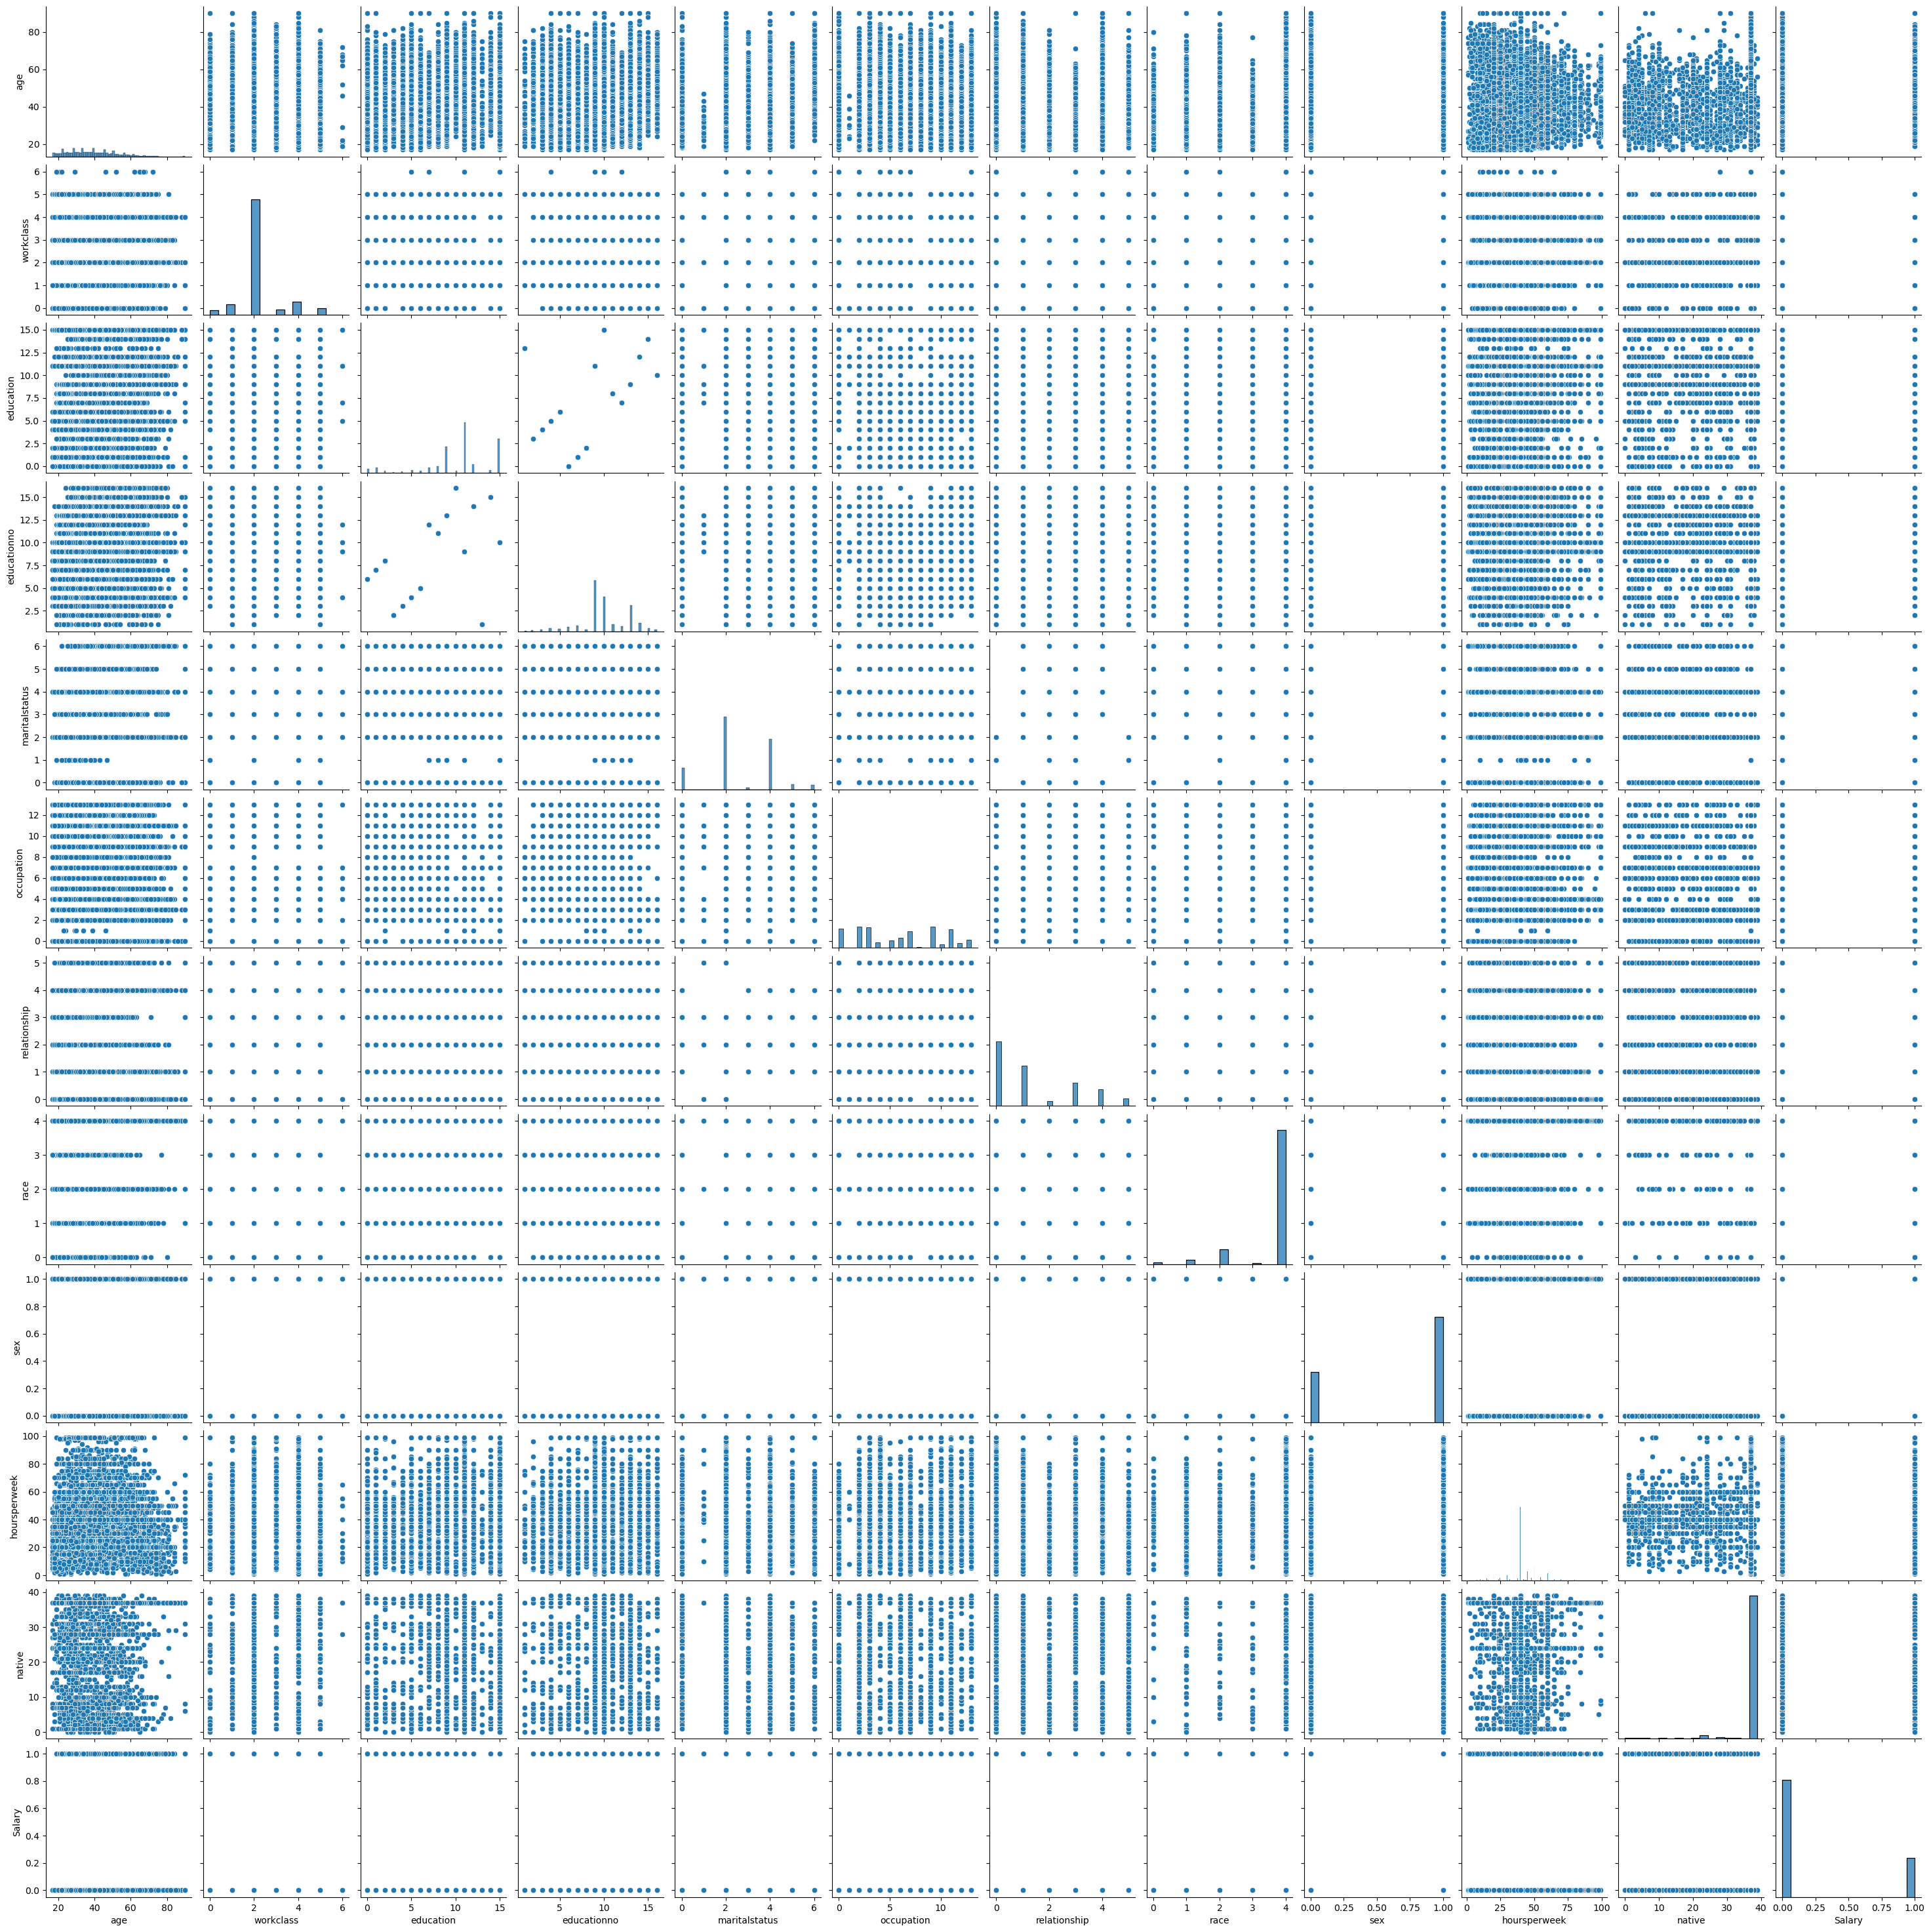

In [5]:
sns.pairplot(sd)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

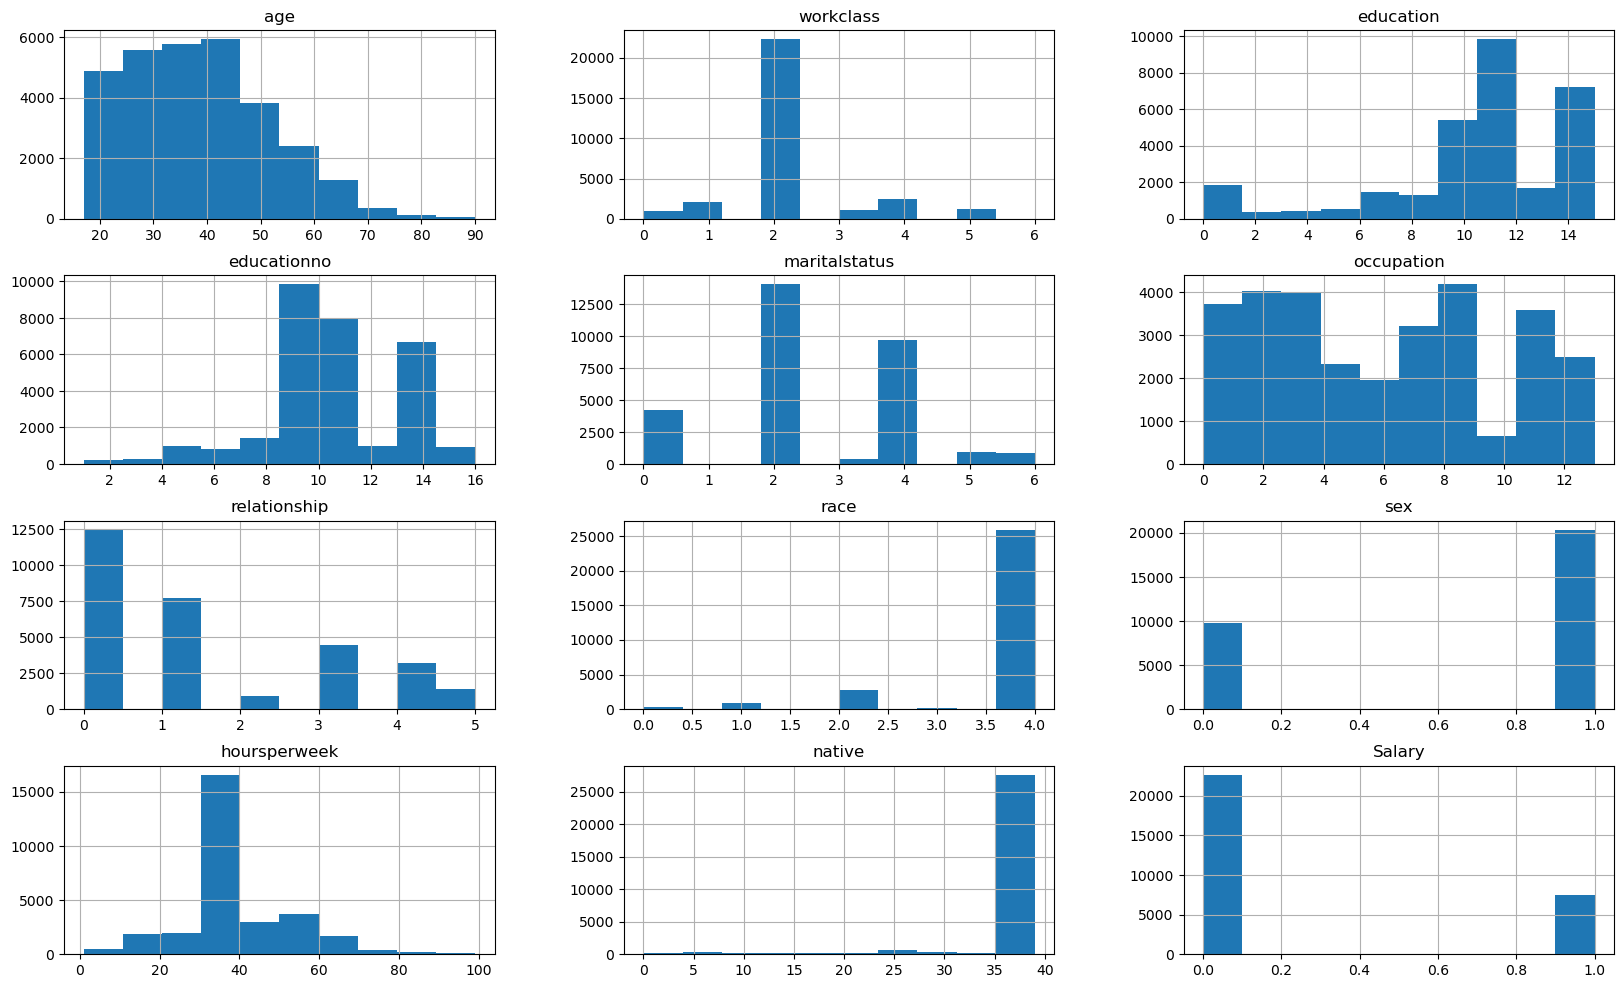

In [6]:
sd.plot
sd.hist(figsize=(20,12))
plt.show

In [7]:
x=sd.iloc[:,:-1]
y=sd['Salary'].values.ravel()

#Salary Test Dataset

In [8]:
sD=pd.read_csv("SalaryData_Test.csv")
sD

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [9]:
label_encoder = LabelEncoder()
sD = sD.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
sD = sD.drop('capitalgain', axis = 1)
sD=sD.drop('capitalloss',axis=1)
sD

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,40,37,0
1,38,2,11,9,2,4,0,4,1,50,37,0
2,28,1,7,12,2,10,0,4,1,40,37,1
3,44,2,15,10,2,6,0,2,1,40,37,1
4,34,2,0,6,4,7,1,4,1,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,40,37,0
15056,39,2,9,13,0,9,1,4,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,50,37,0
15058,44,2,9,13,0,0,3,1,1,40,37,0


In [10]:
X=sd.iloc[:,:-1]
Y=sd['Salary'].values.ravel()

In [11]:
from sklearn.naive_bayes import MultinomialNB as MB

classifier_mb = MB()
classifier_mb.fit(x, y)


MultinomialNB()

In [12]:
test_pred_mb = classifier_mb.predict(X)


In [13]:
accuracy_test_mb = np.mean(test_pred_mb == Y)


In [14]:
accuracy_test_mb

0.735983554921919

In [15]:
from sklearn.naive_bayes import GaussianNB as GB

classifier_gb = GB()
classifier_gb.fit(x, y)


GaussianNB()

In [16]:
test_pred_gb = classifier_gb.predict(X)

In [17]:
accuracy_test_gb = np.mean(test_pred_gb == Y)


In [18]:
accuracy_test_gb

0.7720897848214582